# Programming Exercise 2: Regresion Logistica 

> En este ejercicio, implementarás regresión logística y la aplicarás a dos conjuntos de datos diferentes.

## 1. Logistic Regression

> En esta parte del ejercicio, construirás un modelo de regresión logística para predecir si un estudiante será admitido en una universidad. Supón que eres el administrador de un departamento universitario y deseas determinar la probabilidad de admisión de cada solicitante en función de sus resultados en dos exámenes.
Cuentas con datos históricos de solicitantes anteriores que pueden utilizar como conjunto de entrenamiento para la regresión logística. Para cada ejemplo de entrenamiento, tienes las calificaciones del solicitante en los dos solicitudes y la decisión
Tu tarea es construir un modelo de clasificación que estime la probabilidad de admisión de un solicitante obteniendo en las calificaciones de esos dos exámenes.. 

### 1.1 Visualizing the Data

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import requests
from io import BytesIO

In [2]:

import pandas as pd
import requests
from io import BytesIO

# URL directa al archivo Excel (raw)
url = 'https://raw.githubusercontent.com/Marlon2507/MACHINE-LEARNING-I/main/DATA/datos_economicos.xlsx'

# Descargar el archivo en memoria
response = requests.get(url)
if response.status_code == 200:
    archivo = BytesIO(response.content)

    # Leer el archivo Excel con pandas
    df = pd.read_excel(archivo, engine='openpyxl')

    # Renombrar columnas si es necesario
    df.columns = ['tasa_desempleo', 'crecimiento_pib', 'crisis_economica']

    print(df.head())
else:
    print("Error al descargar el archivo:", response.status_code)



   tasa_desempleo  crecimiento_pib  crisis_economica
0            7.49             4.70                 0
1           14.41             2.75                 0
2           11.78             4.39                 0
3           10.18             3.95                 0
4            4.87             0.98                 0


In [3]:
df.describe().T  # Descripcion de las variables

,count,mean,std,min,25%,50%,75%,max
tasa_desempleo,50.0,8.3508,3.466457,3.25,5.205,8.230,10.7975,14.64
crecimiento_pib,50.0,-0.0554,3.068117,-4.94,-2.830,0.085,2.7100,4.87
crisis_economica,50.0,0.2400,0.431419,0.00,0.000,0.000,0.0000,1.00


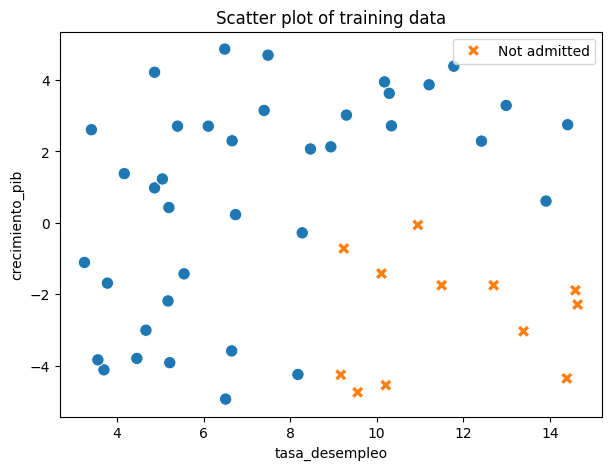

In [4]:
plt.figure(figsize=(7,5))
ax = sns.scatterplot(x='tasa_desempleo', y='crecimiento_pib', hue='crisis_economica', data=df, style='crisis_economica', s=80)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[1:], ['Not admitted', 'Admitted'])
plt.title('Scatter plot of training data')
plt.show(ax)

### 1.2 Implementation

#### 1.2.1 Sigmoid Function

Logistic regression hypothesis: 

$$h_\theta(x) = g(\theta^Tx)$$

$$g(z) = \frac{1}{1+e^{-z}}$$

In [5]:
def sigmoid(z):
    z = np.array(z)
    return 1 / (1+np.exp(-z))

Plot of sigmoid function:

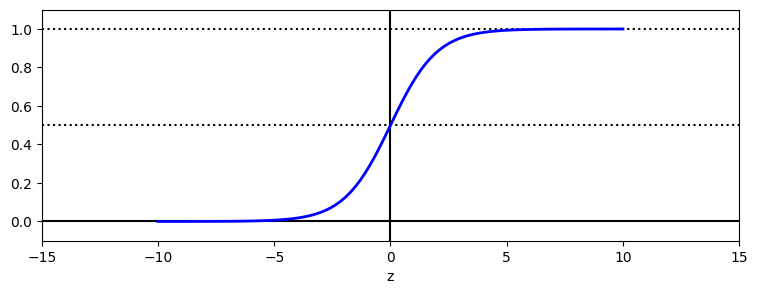

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline
z = np.linspace(-10, 10, 100)
sig = sigmoid(z)
plt.figure(figsize=(9, 3))
plt.plot([-15, 15], [0, 0], "k-")
plt.plot([-15, 15], [0.5, 0.5], "k:")
plt.plot([-15, 15], [1, 1], "k:")
plt.plot([0, 0], [-1.1, 1.1], "k-")
plt.plot(z, sig, "b-", linewidth=2)
plt.xlabel("z")
plt.axis([-15, 15, -0.1, 1.1])
plt.show()

#### 1.2.2 Cost Function and Gradient
La función de costo en regresión logística es: $$J(\theta) = -\frac{1}{m}\sum_{i=1}^m[y^i log(h_\theta(x^i))+(1-y^i)log(1-h_\theta(x^i))]$$ Implementación vectorizada: $h = g(X\theta)$ traduceme esto $J(\theta) = \frac{1}{m}(-y^T log(h)-(1-y)^Tlog(1-h))$ El gradiente del costo es un vector de la misma longitud que $\theta$ donde el $j^{ésimo}$ elemento (para $j=0,1,...,n$) se define de la siguiente manera: $$\nabla J(\theta) = \frac{1}{m} \sum_{i=1}^m ((h_\theta(x^i) - y^i) \cdot x_j^i)$$ Vectorizado: $\nabla J(\theta) = \frac{1}{m} \cdot X^T \cdot (g(X\theta)-y)$

In [7]:
def cost_function(theta, X, y):
    m = y.shape[0]
    theta = theta[:, np.newaxis] #truco para hacer que Numpy minimice el trabajo
    h = sigmoid(X.dot(theta))
    J = (1/m) * (-y.T.dot(np.log(h)) - (1-y).T.dot(np.log(1-h)))

    diff_hy = h - y
    grad = (1/m) * diff_hy.T.dot(X)

    return J, grad

In [8]:
m = df.shape[0]
X = np.hstack((np.ones((m,1)),df[['tasa_desempleo', 'crecimiento_pib']].values))
y = np.array(df.crisis_economica.values).reshape(-1,1)
initial_theta = np.zeros(shape=(X.shape[1]))

In [9]:
cost, grad = cost_function(initial_theta, X, y)
print('Cost at initial theta (zeros):', cost)
print('Expected cost (approx): 0.693')
print('Gradient at initial theta (zeros):')
print(grad.T)
print('Expected gradients (approx):\n -0.1000\n -12.0092\n -11.2628')

Cost at initial theta (zeros): [[0.69314718]]
Expected cost (approx): 0.693
Gradient at initial theta (zeros):
[[0.26  ]
 [1.3664]
 [0.5891]]
Expected gradients (approx):
 -0.1000
 -12.0092
 -11.2628


In [10]:
test_theta = np.array([-24, 0.2, 0.2])
[cost, grad] = cost_function(test_theta, X, y)

print('Cost at test theta:', cost)
print('Expected cost (approx): 0.218')
print('Gradient at test theta:')
print(grad.T)
print('Expected gradients (approx):\n 0.043\n 2.566\n 2.647')

Cost at test theta: [[5.32156]]
Expected cost (approx): 0.218
Gradient at test theta:
[[-0.24  ]
 [-2.809 ]
 [ 0.6168]]
Expected gradients (approx):
 0.043
 2.566
 2.647


### 2.6 Codigo Equivalente usando  Scikit-Learn:

In [11]:
# 1. Importar librerías necesarias
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import requests
from io import BytesIO

# URL directa al archivo Excel (raw)
url = 'https://raw.githubusercontent.com/Marlon2507/MACHINE-LEARNING-I/main/DATA/datos_economicos.xlsx'

# Descargar el archivo en memoria
response = requests.get(url)
if response.status_code == 200:
    archivo = BytesIO(response.content)

    # Leer el archivo Excel con pandas
    df = pd.read_excel(archivo, engine='openpyxl')

    # Renombrar columnas si es necesario
    df.columns = ['tasa_desempleo', 'crecimiento_pib', 'crisis_economica']

    print(df.head())
else:
    print("Error al descargar el archivo:", response.status_code)


# 3. Definir X e y
X = df[["tasa_desempleo", "crecimiento_pib"]]  # NOTA: aquí no se necesita add_constant
y = df["crisis_economica"]

# 4. Dividir en entrenamiento y prueba (opcional)
# En este caso se entrena con todos los datos (como con statsmodels)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)



# 5. Crear y ajustar el modelo de regresión logística
modelo = LogisticRegression(solver='liblinear')

# Solvers disponibles:
# - 'liblinear'  : Bueno para datasets pequeños. Soporta L1 y L2. (por defecto en regresión binaria)
# - 'lbfgs'      : Rápido, robusto y multiclase (one-vs-rest). Ideal para muchos datos. Soporta solo L2.
# - 'newton-cg'  : Similar a lbfgs, pero usa el método de Newton. Solo L2.
# - 'sag'        : Estocástico (bueno para datasets grandes). Solo L2. Requiere que X esté estandarizado.
# - 'saga'       : Como 'sag' pero soporta L1, L2 y elastic net. Funciona bien con datos dispersos (sparse).

modelo.fit(X, y)

# 6. Obtener predicciones de clase y de probabilidad
df["probabilidad"] = modelo.predict_proba(X)[:, 1]
df["prediccion"] = modelo.predict(X)

# 7. Evaluar desempeño del modelo
print("\n🔍 Evaluación del Modelo (scikit-learn):")
print("Accuracy:", round(accuracy_score(y, df["prediccion"]), 4))
print("Matriz de confusión:\n", confusion_matrix(y, df["prediccion"]))
print("\nReporte de clasificación:\n", classification_report(y, df["prediccion"]))

################################################################################# NOTAS IMPORTANTES############################################3
#LogisticRegression() usa regularización L2 por defecto. Puedes cambiarla con penalty='l1' y usar solver='liblinear' para compatibilidad.
#Puedes ajustar la fuerza de regularización con el parámetro C. Por ejemplo: LogisticRegression(C=0.1) (a menor C, mayor regularización).
#predict_proba() devuelve las probabilidades de pertenecer a cada clase (útil para umbrales distintos de 0.5).




   tasa_desempleo  crecimiento_pib  crisis_economica
0            7.49             4.70                 0
1           14.41             2.75                 0
2           11.78             4.39                 0
3           10.18             3.95                 0
4            4.87             0.98                 0

🔍 Evaluación del Modelo (scikit-learn):
Accuracy: 0.9
Matriz de confusión:
 [[36  2]
 [ 3  9]]

Reporte de clasificación:
               precision    recall  f1-score   support

           0       0.92      0.95      0.94        38
           1       0.82      0.75      0.78        12

    accuracy                           0.90        50
   macro avg       0.87      0.85      0.86        50
weighted avg       0.90      0.90      0.90        50



## Regresión Logística (Logit clásico) con statsmodels

In [12]:
# 1. Importar librerías necesarias
import numpy as np
import pandas as pd
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

# URL directa al archivo Excel (raw)
url = 'https://raw.githubusercontent.com/Marlon2507/MACHINE-LEARNING-I/main/DATA/datos_economicos.xlsx'

# Descargar el archivo en memoria
response = requests.get(url)
if response.status_code == 200:
    archivo = BytesIO(response.content)

    # Leer el archivo Excel con pandas
    df = pd.read_excel(archivo, engine='openpyxl')

    # Renombrar columnas si es necesario
    df.columns = ['tasa_desempleo', 'crecimiento_pib', 'crisis_economica']

    print(df.head())
else:
    print("Error al descargar el archivo:", response.status_code)


# 3. Definir X e y
X = df[["tasa_desempleo", "crecimiento_pib"]]  # Agrega columna 'const' para intercepto
y = df["crisis_economica"]





# 4. Dividir en entrenamiento y prueba (opcional
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 5. Crear y ajustar el modelo Logit
logit_model = sm.Logit(y, X)
result = logit_model.fit()

# 6. Mostrar resumen estadístico del modelo
print(result.summary())

# 7. Obtener predicciones (probabilidades)
df["probabilidad"] = result.predict(X)

# 8. Clasificación binaria con umbral 0.5
df["prediccion"] = (df["probabilidad"] >= 0.5).astype(int)

# 9. Medir desempeño del modelo
print("\n🔍 Evaluación del Modelo:")
print("Accuracy:", round(accuracy_score(y, df["prediccion"]), 4))
print("Matriz de confusión:\n", confusion_matrix(y, df["prediccion"]))

################################################################################# NOTAS IMPORTANTES############################################3
#¿Qué ventajas ofrece statsmodels?
#Permite analizar la significancia estadística de cada variable (p-value).
#Muestra intervalos de confianza y errores estándar.
#Es ideal para interpretación, informes técnicos y papers.




   tasa_desempleo  crecimiento_pib  crisis_economica
0            7.49             4.70                 0
1           14.41             2.75                 0
2           11.78             4.39                 0
3           10.18             3.95                 0
4            4.87             0.98                 0
Optimization terminated successfully.
         Current function value: 0.560443
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:       crisis_economica   No. Observations:                   50
Model:                          Logit   Df Residuals:                       48
Method:                           MLE   Df Model:                            1
Date:                Thu, 12 Jun 2025   Pseudo R-squ.:                -0.01699
Time:                        21:24:43   Log-Likelihood:                -28.022
converged:                       True   LL-Null:                       -27.554
Covariance Type:           

# 📘 Interpretación de los Coeficientes en Regresión Logística

## ✅ 1. ¿Qué son los *odds*?

La **razón de probabilidades** (odds) se calcula así:

$$
\text{odds} = \frac{p}{1 - p}
$$

Donde $p$ es la probabilidad de que ocurra el evento (por ejemplo, ser admitido).

| Probabilidad $p$ | Odds $\frac{p}{1 - p}$ |
|------------------|------------------------|
| 0.50 (50%)       | 1                      |
| 0.75 (75%)       | 3                      |
| 0.20 (20%)       | 0.25                   |
| 0.90 (90%)       | 9                      |

---

## ✅ 2. Modelo Logístico

La regresión logística modela el **logit** de la probabilidad como una combinación lineal de variables:

$$
\log\left( \frac{p}{1 - p} \right) = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \cdots + \beta_n x_n
$$

- El lado izquierdo es el **logit** (logaritmo de los odds).
- Cada coeficiente $\beta_i$ representa el cambio en el log-odds.
- Usamos $e^{\beta_i}$ para interpretar directamente sobre los odds.

---

## ✅ 3. Interpretación de $e^{\beta}$ (Razón de odds)

| Tipo de variable         | Interpretación de $e^{\beta}$ |
|--------------------------|-------------------------------|
| **Continua**             | Por cada unidad adicional, los **odds** del evento se multiplican por $e^{\beta}$. |
| **Categórica binaria**   | Al pasar de la categoría base (0) a la comparada (1), los odds se multiplican por $e^{\beta}$. |
| **Categórica (dummies)** | Comparado con la categoría de referencia, los odds se multiplican por $e^{\beta}$. |

---

## 🧪 Ejemplo 1: Variable Continua

Supón que:

$$
\beta = 0.2 \Rightarrow e^{0.2} \approx 1.22
$$

**Interpretación:**  
Por cada unidad adicional en la variable (ej. puntaje de examen), los **odds del evento aumentan un 22%**.  
La probabilidad también aumenta, aunque no de forma lineal.

---

## 🧪 Ejemplo 2: Variable Categórica Binaria

Supón que:

$$
\beta = -0.4 \Rightarrow e^{-0.4} \approx 0.67
$$

**Interpretación:**  
Pasar de la categoría base a la comparada **reduce los odds del evento en 33%**.  
Esto implica que la **probabilidad del evento disminuye**.

---

## 🧠 Notas clave

- $\beta$ afecta el **logaritmo de los odds**.
- $e^{\beta}$ afecta directamente los **odds** (razón de probabilidades).
- La **probabilidad** no cambia de forma lineal respecto a $\beta$.

---

## ✅ Resumen

> “Cada coeficiente $\beta$ nos dice cómo cambia la **razón de que ocurra frente a que no ocurra el evento**.  
> Si tomamos $e^{\beta}$, eso nos dice cuántas veces **más o menos probable** es que ocurra el evento cuando cambia esa variable.”


## Calculo de la Curva ROC

# 📈 ¿Cómo surge la curva ROC?

La **curva ROC (Receiver Operating Characteristic)** muestra gráficamente la capacidad de un modelo de clasificación binaria para distinguir entre clases a medida que varía el **umbral de decisión**.

Se construye comparando los valores **predichos como probabilidades** con los valores reales (0 o 1).

---

## 🔁 ¿Cómo se construye paso a paso?

### 1. El modelo predice probabilidades

Por ejemplo:

| Observación | Probabilidad predicha |
|-------------|------------------------|
| 1           | 0.90                   |
| 2           | 0.75                   |
| 3           | 0.60                   |
| 4           | 0.45                   |
| 5           | 0.20                   |

---

### 2. Se elige un umbral

Un modelo de clasificación convierte las probabilidades en clases con un **umbral**.

- Umbral típico: **0.5**
- Si cambiamos el umbral, cambian las predicciones y la matriz de confusión.

---

### 3. Para cada umbral se calcula:

- **TPR** (True Positive Rate o Sensibilidad):

$$
TPR = \frac{TP}{TP + FN}
$$

- **FPR** (False Positive Rate o 1 - especificidad):

$$
FPR = \frac{FP}{FP + TN}
$$

---

### 4. Se repite para muchos umbrales

Por ejemplo: desde 1.0 hasta 0.0, en pasos.

Para cada umbral:
- Se generan predicciones binarias
- Se calcula la matriz de confusión
- Se obtienen TPR y FPR
- Se guarda el punto \( (FPR, TPR) \)

---

### 5. Se grafica la curva

- Eje **X**: FPR (Tasa de Falsos Positivos)
- Eje **Y**: TPR (Tasa de Verdaderos Positivos)

$$
\text{Curva ROC} = \{(FPR, TPR) \text{ para todos los umbrales}\}
$$

- Un modelo **perfecto** alcanza el punto (0, 1)
- Un modelo **aleatorio** genera una línea diagonal de (0, 0) a (1, 1)

---

## 🧠 ¿Qué representa la curva ROC?

Muestra el **compromiso entre sensibilidad y especificidad**.  

Cuanto más arriba y a la izquierda esté la curva, **mejor es el modelo**.

Se puede resumir con el **AUC (Área bajo la curva ROC)**.

---

### AUC y su interpretación

| AUC         | Interpretación                      |
|-------------|--------------------------------------|
| 0.5         | Modelo aleatorio                    |
| 0.6 – 0.7   | Discriminación pobre                |
| 0.7 – 0.8   | Aceptable                           |
| 0.8 – 0.9   | Buena                               |
| 0.9 – 1.0   | Excelente                           |
| 1.0         | Perfecto (sospechoso en la práctica) |

---

## 🎯 Resumen

1. El modelo predice probabilidades.
2. Se prueban muchos umbrales.
3. Para cada uno, se calcula TPR y FPR.
4. Se grafican los puntos \( (FPR, TPR) \).
5. Se analiza el **AUC** para medir la calidad general.

---

> ✅ La curva ROC **no depende de un solo umbral** y es muy útil cuando las clases están desbalanceadas.



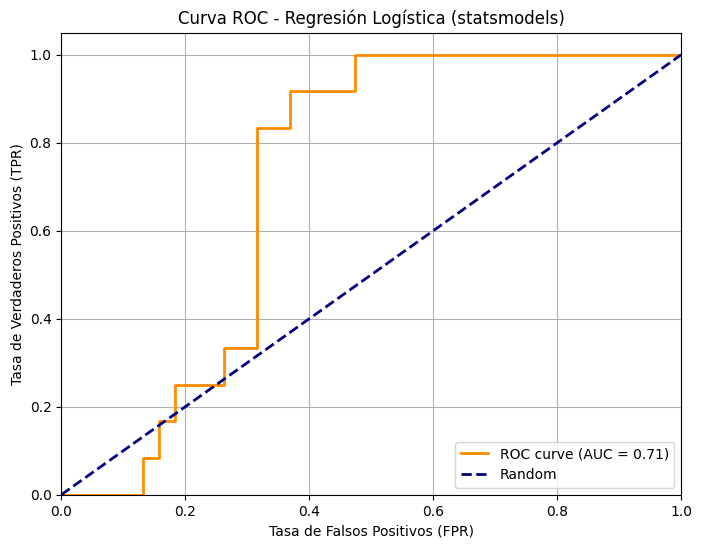

In [13]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# 10. Calcular valores para la curva ROC
fpr, tpr, thresholds = roc_curve(y, df["probabilidad"])
roc_auc = roc_auc_score(y, df["probabilidad"])

# 11. Graficar la curva ROC
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curva ROC - Regresión Logística (statsmodels)')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

## Mas Metricas de la matriz de confusión  

In [14]:
from sklearn.metrics import confusion_matrix

def metricas_matriz_confusion(y_verdadero, y_predicho):
    """
    Calcula e imprime los principales indicadores derivados de la matriz de confusión
    para un problema de clasificación binaria.

    Parámetros:
    - y_verdadero: etiquetas reales (lista, array o Series)
    - y_predicho: etiquetas predichas (lista, array o Series)
    """
    # Extraer verdaderos y falsos positivos/negativos
    tn, fp, fn, tp = confusion_matrix(y_verdadero, y_predicho).ravel()

    # Cálculo de métricas
    exactitud     = (tp + tn) / (tp + tn + fp + fn)
    precision     = tp / (tp + fp) if (tp + fp) > 0 else 0
    sensibilidad  = tp / (tp + fn) if (tp + fn) > 0 else 0  # también llamada Recall
    especificidad = tn / (tn + fp) if (tn + fp) > 0 else 0
    valor_f1      = 2 * (precision * sensibilidad) / (precision + sensibilidad) if (precision + sensibilidad) > 0 else 0
    tasa_falsos_positivos = fp / (fp + tn) if (fp + tn) > 0 else 0

    # Imprimir resultados
    print("📊 Métricas de la Matriz de Confusión")
    print(f" Verdaderos Positivos (VP / TP): {tp}")
    print(f" Falsos Positivos (FP): {fp}")
    print(f" Falsos Negativos (FN): {fn}")
    print(f" Verdaderos Negativos (VN / TN): {tn}")
    print(f"\n Exactitud:     {exactitud:.4f}")
    print(f" Precisión:     {precision:.4f}")
    print(f" Sensibilidad:  {sensibilidad:.4f}")
    print(f" Especificidad: {especificidad:.4f}")
    print(f" Valor F1:      {valor_f1:.4f}")
    print(f" Tasa FP:       {tasa_falsos_positivos:.4f}")


In [15]:
metricas_matriz_confusion(y, df["prediccion"])

📊 Métricas de la Matriz de Confusión
 Verdaderos Positivos (VP / TP): 4
 Falsos Positivos (FP): 11
 Falsos Negativos (FN): 8
 Verdaderos Negativos (VN / TN): 27

 Exactitud:     0.6200
 Precisión:     0.2667
 Sensibilidad:  0.3333
 Especificidad: 0.7105
 Valor F1:      0.2963
 Tasa FP:       0.2895



Aquí tienes un gráfico de dispersión con ajuste de regresión logística que muestra la relación entre la probabilidad estimada y la ocurrencia de una crisis económica:

Cada punto azul representa una observación con su probabilidad estimada y si ocurrió o no una crisis económica.

La curva roja es el ajuste de una regresión logística, que modela la probabilidad de crisis en función de la variable probabilidad.

Este tipo de gráfico es muy útil para visualizar cómo una variable continua (como la probabilidad) puede predecir un resultado binario (como crisis económica: sí o no).

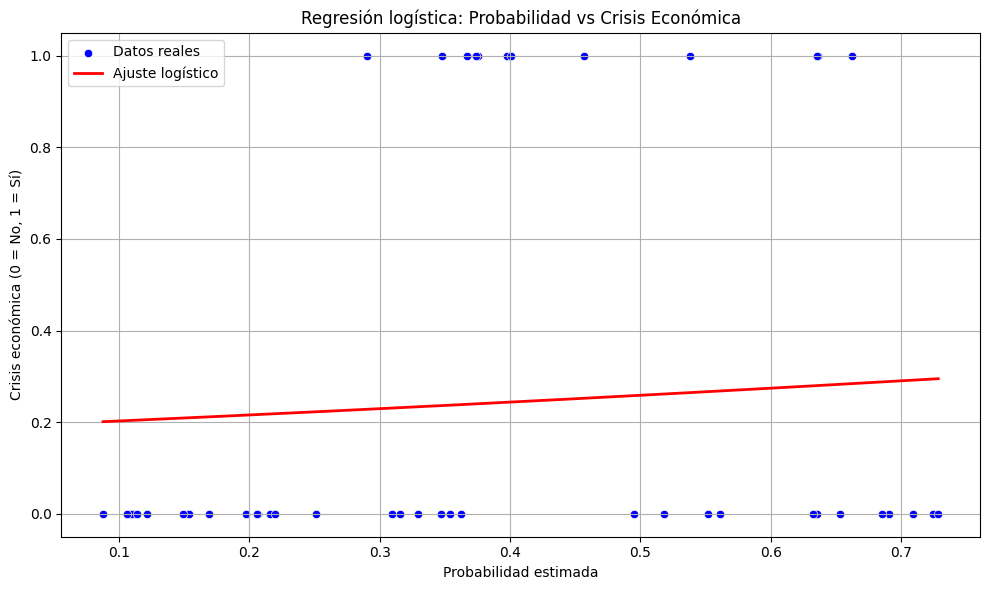

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.linear_model import LogisticRegression

# Leer el archivo Excel
df = pd.read_excel("Economia25.xlsx", engine='openpyxl')

# Eliminar filas con valores faltantes en las columnas relevantes
df = df[['probabilidad', 'crisis_economica']].dropna()

# Extraer variables
X = df[['probabilidad']].values
y = df['crisis_economica'].values

# Ajustar modelo de regresión logística
model = LogisticRegression()
model.fit(X, y)

# Crear puntos para la curva de predicción
x_vals = np.linspace(X.min(), X.max(), 300).reshape(-1, 1)
y_probs = model.predict_proba(x_vals)[:, 1]

# Graficar los datos y la curva de regresión logística
plt.figure(figsize=(10, 6))
sns.scatterplot(x='probabilidad', y='crisis_economica', data=df, color='blue', label='Datos reales')
plt.plot(x_vals, y_probs, color='red', linewidth=2, label='Ajuste logístico')
plt.title('Regresión logística: Probabilidad vs Crisis Económica')
plt.xlabel('Probabilidad estimada')
plt.ylabel('Crisis económica (0 = No, 1 = Sí)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
